<a href="https://colab.research.google.com/github/cinth90/Datascience1/blob/main/imputacion_de_datos_nulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Manejo de datos nulos:
**Forma Manual (media)**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

URL_DATASET = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

df=pd.read_csv(URL_DATASET, header=None, sep="," ,
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

df.head()

#Rellenar valores nulos con la media
df.fillna(df.mean(), inplace=True) # Inplace = True--> modifica el DataFrame original (df) directamente.Si se omite, el método fillna devuelve un nuevo DataFrame con los cambios
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Analisis de cantidad de nulls

**1. df.isna()**
El primer paso es usar df.isna(). Este método inspecciona cada celda del DataFrame df y crea un nuevo DataFrame del mismo tamaño, pero compuesto por valores booleanos:

True si la celda original tenía un valor faltante (NaN).

False si la celda tenía un valor.

**2. .mean()**
Al aplicar el método .mean() a este DataFrame de booleanos, pandas trata a True como 1 y a False como 0. Esto significa que la media de cada columna es la suma de los valores True dividida por el número total de valores, lo que resulta en la proporción de valores faltantes en cada columna. Por ejemplo, si una columna tiene 20 valores faltantes de 100 en total, su media será 0.20.
3. * 100
Luego, el resultado de la media (que es una proporción) se multiplica por 100 para convertirlo en un porcentaje. Siguiendo el ejemplo anterior, la proporción de 0.20 se convierte en un 20.

**4. .round(2)**
Este método redondea el porcentaje a dos decimales, lo cual hace el resultado más limpio y legible.

**5. .sort_values(ascending=False)**
Finalmente, se ordenan los porcentajes de forma descendente. Esto es útil porque te permite ver de inmediato qué columnas tienen la mayor cantidad de valores faltantes, lo cual es clave para priorizar tu trabajo de limpieza de datos.

#Resultado Final
El resultado es una Serie de pandas que muestra el porcentaje de valores faltantes para cada columna, ordenado de mayor a menor. Esto te da una visión clara y rápida del estado de tu DataFrame.

In [18]:
df.replace(0,np.nan, inplace=True) #reemplaza los ceros por nan

(df.isna().mean() * 100).round(2).sort_values(ascending=False) #muestra el porcentaje de valores faltantes para cada columna, ordenado de mayor a menor.

,0
Outcome,65.10
Insulin,48.70
SkinThickness,29.56
Pregnancies,14.45
BloodPressure,4.56
BMI,1.43
Glucose,0.65
DiabetesPedigreeFunction,0.00
Age,0.00


In [19]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,657.0,4.494673,3.217291,1.000,2.00000,4.0000,7.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,268.0,1.000000,0.000000,1.000,1.00000,1.0000,1.00000,1.00


#Imputaciones:

#Mediana vs Media(Promedio)
Para un proyecto de machine learning, la elección entre media, moda y mediana depende del tipo de datos y del contexto específico. Cuándo usar cada una:

#Media (Promedio)
Cuándo usarla:

Con datos numéricos continuos sin valores atípicos extremos
Cuando la distribución es aproximadamente normal
Para variables como edad, ingresos, temperatura, etc. (sin outliers)
Ejemplo: Si tienes edades como [25, 28, 30, 32, 35], la media (30) representa bien el conjunto.

#Mediana
Cuándo usarla:

Con datos numéricos que tienen valores atípicos (outliers)
Cuando la distribución es sesgada
Para datos ordinales
Es más robusta ante valores extremos
Ejemplo: En ingresos como [30K, 35K, 40K, 45K, 500K], la mediana (40K) es más representativa que la media (130K).

#Moda
Cuándo usarla:

Con datos categóricos (texto, etiquetas)
Con datos numéricos discretos donde buscas el valor más frecuente
Para variables como género, país, categoría de producto, etc.
Ejemplo: En una columna de países [México, Argentina, México, Brasil, México], la moda es "México".

#Recomendaciones prácticas:
Analiza primero la distribución de tus datos con histogramas o boxplots
Detecta outliers antes de decidir
Considera el contexto del negocio - ¿qué medida tiene más sentido para tu problema?
Prueba diferentes enfoques y evalúa el impacto en tu modelo

#Función: generar_distribuciones
Sirve para visualizar la distribución de todas las variables numéricas en un DataFrame, utilizando histogramas.

**def generar_distribuciones(df: pd.DataFrame) -> None:**
Esta línea define la función. Acepta un único argumento, df, que se espera sea un DataFrame de pandas, y no devuelve ningún valor.

**fig = plt.figure(figsize=(16, 9))**
Aquí se crea una figura (el lienzo principal donde se dibujarán los gráficos) con un tamaño de 16x9 pulgadas.

**df.hist(...)**
Este es el corazón de la función. El método .hist() de pandas es un atajo muy útil para generar un histograma por cada columna numérica del DataFrame. Dentro de los paréntesis, se definen los parámetros de visualización:

**bins=20:** Divide el rango de valores de cada columna en 20 intervalos o barras.

**layout=(3, 3)**: Organiza los histogramas en una cuadrícula de 3 filas y 3 columnas.

**color='skyblue', alpha=0.7, edgecolor='black'**: Estos parámetros estilizan los gráficos, cambiando el color del interior de las barras a azul claro, su transparencia a 70% y el color del borde a negro.

**plt.suptitle(...)**: Agrega un título principal a toda la figura.

**plt.tight_layout()**: Ajusta automáticamente los subplots para que los títulos y las etiquetas de los ejes no se superpongan entre sí.

En resumen, la función es una herramienta práctica para realizar un análisis exploratorio de datos (EDA), permitiendo una inspección visual rápida de la forma de las distribuciones de tus variables, lo que es crucial para entender la naturaleza de tus datos.


In [20]:
import matplotlib.pyplot as plt

def generar_distribuciones(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(16, 9))
    df.hist(bins=20, layout=(3, 3), color='skyblue', alpha=0.7, edgecolor='black')
    plt.suptitle('Distribuciones ', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

In [21]:
medianas = df.median()

<Figure size 1600x900 with 0 Axes>

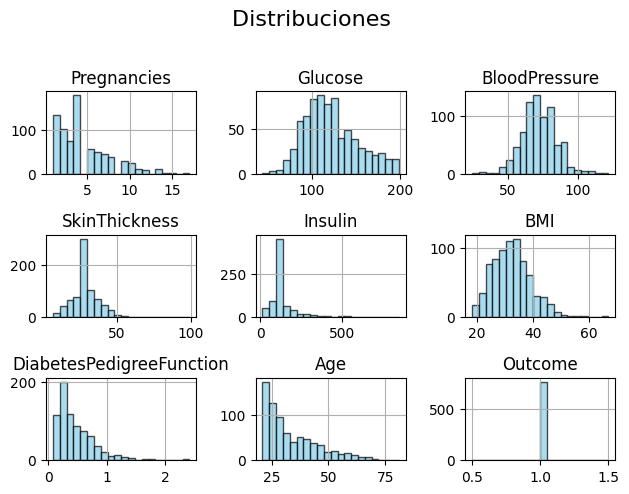

In [22]:
df_imputada_mediana = df.fillna(medianas)
generar_distribuciones(df_imputada_mediana)

#Usando tecnicas mas eficientes dado a la cantidad de datos **nulls**

In [23]:
columna_outcome = ['Outcome']
columna_simple_imputer = ['BMI']
columnas_knn_imputer = ['Glucose', 'BloodPressure', 'Outcome']
columnas_iterative_imputer = ['Pregnancies', 'SkinThickness', 'Insulin', ]

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer # librería diseñada para rellenar datos faltantes.
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge #modelo de machine learning para prededir faltantes

# Crear una copia del dataframe para no modificar el original
df_imputed = df.copy()

El comentario # Se llena con ceros, pues es el valor binario de no tiene diabetes es crucial para entender el porqué de esta decisión. No se trata de una imputación estadística (como la media o mediana), sino de una imputación basada en el conocimiento del dominio. El usuario asume que, si el valor en esa columna está ausente, significa que la persona no tiene la condición, y el valor binario para "no" es 0.

In [25]:
# Se llena con ceros, pues es el valor binario de no tiene diabetes
df_imputed[columna_outcome] = df_imputed[columna_outcome].fillna(0)

#1. Aplicando SimpleImputer

In [26]:
# 1. Aplicando SimpleImputer
imputer_simple = SimpleImputer(strategy='median') #rellenar nan con estrategia median-->mediana
df_imputed[columna_simple_imputer] = imputer_simple.fit_transform(df_imputed[columna_simple_imputer])
#.fit(): El imputador aprende la mediana de la columna especificada, ignorando los valores nulos.
#.transform(): El imputador aplica esa mediana para reemplazar los valores nulos en la columna.

# 2. Aplicando KNNImputer al resto de las columnas (K-Vecinos Más Cercanos (KNN))

In [27]:
# 2. Aplicar KNNImputer al resto de las columnas (K-Vecinos Más Cercanos (KNN))
imputer_knn = KNNImputer(n_neighbors=5) #para cada valor faltante, debe buscar a los 5 puntos de datos más cercanos o similares en el resto del conjunto de datos.
df_imputed[columnas_knn_imputer] = imputer_knn.fit_transform(df_imputed[columnas_knn_imputer])
#.fit(): El imputador analiza la información de las columnas que no tienen valores faltantes en tu df para entender cómo se relacionan los puntos de datos.
#.transform(): Con base en el análisis anterior, por cada valor nulo, busca a sus 5 vecinos más cercanos y calcula un valor de reemplazo
#(generalmente la media de los valores de esos vecinos) para rellenar el dato faltante



#Imputación iterativa:
 A diferencia de métodos simples como la media o la mediana, este enfoque utiliza un modelo de **machine learning** para predecir los valores que faltan, aprovechando las relaciones entre todas las variables.

***Desglose del Proceso***
El proceso funciona como un detective que resuelve un rompecabezas paso a paso. En lugar de adivinar, el modelo hace una suposición inicial y luego la refina repetidamente.

**Imputación inicial**: El proceso comienza con una imputación simple. La línea initial_strategy='mean' indica que todos los valores faltantes se rellenan temporalmente con la media de su columna.

**Ciclo de predicción**: El imputador entra en un ciclo (max_iter=20). En cada iteración:

Selecciona una columna con valores faltantes (siguiendo el imputation_order='ascending').

Trata a esa columna como la variable objetivo (y) y a todas las demás como variables predictoras (X).

Entrena un modelo de machine learning (estimator=BayesianRidge) para predecir los valores faltantes en la columna objetivo.

Remplaza los valores faltantes con las predicciones del modelo.

**Refinamiento**: Este proceso se repite para cada columna con datos faltantes. A medida que se llenan más valores, el modelo tiene datos más completos para hacer predicciones en las siguientes iteraciones, lo que mejora la precisión.

**Convergencia**: El ciclo se detiene si se alcanza el número máximo de iteraciones (max_iter) o si la mejora en las predicciones es mínima, según la tolerancia (tol). Si la diferencia entre los valores imputados de una iteración a la siguiente es menor que 1×10−3, el proceso se detiene antes de alcanzar el max_iter porque se considera que ha alcanzado una solución estable.

#Componentes Clave
**IterativeImputer**: La herramienta principal que orquesta todo el proceso de imputación iterativa, asegurando que las predicciones se refinen en cada ciclo.

**estimator=BayesianRidge**: El modelo de machine learning real que hace el trabajo de predicción. BayesianRidge es un tipo de regresión robusta y eficiente, ideal para este tipo de tareas. Los parámetros dentro del estimador afinan su comportamiento para un mejor rendimiento. **alpha_1 y alpha_2**: Hiperparámetros que controlan la regularización del modelo. Estos valores pequeños (1×10 −5 ) indican que se aplica una penalización muy ligera a la complejidad del modelo, ayudando a prevenir el sobreajuste sin ser demasiado restrictivos.

**n_nearest_features=10**: Una optimización importante. Para predecir un valor faltante, el modelo no usa todas las columnas, sino solo las 10 que están más fuertemente correlacionadas con la columna que se está imputando. Esto aumenta la velocidad y la precisión.

**imputation_order:** El orden en el que se procesan las columnas. Con 'ascending', la imputación comienza con la columna que tiene menos valores faltantes y avanza hacia las que tienen más. Esto asegura que el modelo utilice la mayor cantidad de información disponible en las primeras iteraciones.

**random_state:** Un valor fijo (42) para asegurar la reproducibilidad. Garantiza que si el código se ejecuta de nuevo, los resultados serán idénticos, lo cual es útil para la investigación y la depuración.
**fit_transform()**: El método que ejecuta el proceso. Primero, el imputador aprende los patrones en tus datos (.fit()) y luego los utiliza para rellenar los valores faltantes (.transform()).


In [29]:
# 3. Imputacion Iterativa: utiliza un modelo de machine learning para predecir los valores que faltan, aprovechando las relaciones entre todas las variables.
imputer_iterative = IterativeImputer(
    estimator=BayesianRidge(
        max_iter=500,
        tol=1e-4,
        alpha_1=1e-5,
        alpha_2=1e-5
    ),
    max_iter=20,           # Máximo de iteraciones del MICE
    tol=1e-3,              # Tolerancia de convergencia
    n_nearest_features=10, # Máximo de features a usar
    initial_strategy='mean', # Estrategia inicial
    imputation_order='ascending', # Orden de imputación
    random_state=42
)

df_imputed[columnas_iterative_imputer] = imputer_iterative.fit_transform(df_imputed[columnas_iterative_imputer])

print("DataFrame con valores nulos imputados:")
print(df_imputed.isnull().sum())#verifica el exito al contar la cantidad de valores nulos que quedan en cada columna (que deberían ser cero).


DataFrame con valores nulos imputados:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Figure size 1600x900 with 0 Axes>

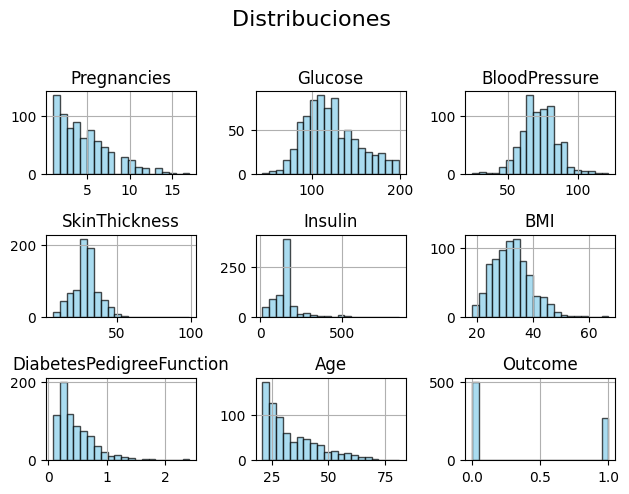

In [30]:
generar_distribuciones(df_imputed)